In [1]:
# scikit learn에서 제공하는 data set을 사용하기 위한 모듈
from sklearn import datasets
# dicision tree 기계학습 모델을 사용하기 위한 모듈
from sklearn.tree import DecisionTreeClassifier
# data set을 train set과 test set으로 분리할 수 있는 클래스를 제공하는 모듈
from sklearn.model_selection import train_test_split
# Stratiffied k fold cross validation을 사용하기 위한 모듈 Kfold
from sklearn.model_selection import StratifiedKFold
# cross validation 결과의 정확도를 측정하기 위한 모듈
from sklearn.model_selection import cross_val_score

In [2]:
# 분석결과의 confusion matrix를 추출하기 위한 모듈
from sklearn.metrics import confusion_matrix
# 분석결과의 accuracy를 측정하기 위한 모듈
from sklearn.metrics import accuracy_score
# 분석결과의 recall, precision, f-measure를 측정하기 위한 모듈
from sklearn.metrics import classification_report
# roc 곡선 아래 넓이를 구하기 위한 모듈
from sklearn.metrics import roc_auc_score
# 분석결과의 MSE를 구하기 위한 모듈
from sklearn.metrics import mean_squared_error

In [3]:
# datasets에 있는 load_breast_cancer 함수를 사용해 유방암 데이터를 가져와 변수 data에 저장
data = datasets.load_breast_cancer()
# 유방암 데이터 중 속성 데이터를 변수 X에 저장
x = data.data
# 유방암 데이터 중 클래스 데이터를 변수 y에 저장
y = data.target

In [4]:
# Train_test_split 함수를 사용해 train set과 test set을 분리하고, test_size를 전체 데이터의 20%로 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
# DecisionTreeClassifier 모델을 변수 clf에 할당
clf = DecisionTreeClassifier()
# Train data(x_train, y_train)와 fit 함수를 사용해 모델 훈련
clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# Predict 함수를 사용해 test data()에 대한 예측값을 구하고 변수 y_pred에 저장
y_pred = clf.predict(x_test)

In [7]:
# test data 실제값인 y_test와 예측 결과값 y_pred를 confusion_matrix 함수에 입력해 matrix 출력
print('Confusion Matrix')
# labels는 진짜, 가짜를 순서 바꾸어주기
print(confusion_matrix(y_test, y_pred, labels = [1,0]))

Confusion Matrix
[[57  8]
 [ 2 47]]


In [8]:
# y_test와 y_pred 값을 비교해 정확도(accuracy)를 출력
print('Accuracy')
# normalize=False: 올바르게 분류된 데이터 건수 출력
# normalize=True: 올바르게 분류된 데이터의 비율 출력
print(accuracy_score(y_test, y_pred, normalize=True))

Accuracy
0.9122807017543859


In [9]:
# 강의자료 p.33
# Classification_report 함수를 사용해 각 클래스에 대한 precision, recall 출력
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        49
           1       0.97      0.88      0.92        65

   micro avg       0.91      0.91      0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [53]:
# Roc_auc_score 함수를 사용해 roc 곡선 아래 면적 출력
print('AUC')
print(roc_auc_score(y_test, y_pred))

AUC
0.9180533751962323


In [54]:
# Mean_squared_error 함수를 사용해 MSE 출력
print('Mean_Squared Error')
print(mean_squared_error(y_test, y_pred))

Mean_Squared Error
0.08771929824561403


K fold cross validation
 데이터 셋 구성

In [57]:
skf = StratifiedKFold(n_splits = 10)
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [60]:
# 10번의 실험을 위한 데이터 셋 구성을 살펴봄
for tarin_index, test_index in skf.split(x, y)
    print('Train set: ', train_index)
    print('Test set: ', test_index)

SyntaxError: invalid syntax (<ipython-input-60-2c65345d29ad>, line 2)

In [63]:
# 기계학습 모델 성능평가
# DecisionTreeClassifier 모델을 clf에 생성
clf = DecisionTreeClassifier()
# Cross_val_score 함수를 사용해 x, y 데이터에 대해 10 fold cross validation 진행한 accuracy 출력
scores = cross_val_score(clf, x, y, cv = skf)
# 10개 accuracy의 평균 출력
print('K Fold Cross Validation Score')
print(scores)
print('Average Accuracy')
print(scores.mean())

K Fold Cross Validation Score
[0.9137931  0.87931034 0.9122807  0.84210526 0.96491228 0.87719298
 0.85964912 0.94642857 0.91071429 0.92857143]
Average Accuracy
0.9034958084867342


K fold cross validation - shuffle

In [64]:
# StratifiedKFold 모듈을 사용해 10 cross validation 모듈을 skf로 생성
# Shuffle을 True로 설정하여 데이터를 섞은 후 데이터 셋 구성하도록 함
skf_sh = StratifiedKFold(n_splits = 10, shuffle = True)
skf_sh.get_n_splits(x, y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [65]:
# 10번의 실험을 위한 데이터 셋 구성을 살펴봄
# 앞 실험과 다르게 데이터 인덱스가 섞여 있음을 확인할 수 있음
for train_index, test_index in skf_sh.split(x, y):
    print('Train set: ', train_index)
    print('Test set: ', test_index)

Train set:  [  0   1   3   4   5   6   8   9  10  11  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  30  31  32  33  34  35  36  37  38  40  41
  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58  59  60
  61  62  63  65  67  68  69  70  71  72  73  74  75  77  78  79  80  81
  82  83  84  86  87  88  89  91  92  93  94  96  97  99 100 101 102 103
 104 105 106 107 108 111 112 113 114 115 116 118 119 120 121 122 123 125
 126 127 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 159 160 161 162 163 164
 166 167 168 169 171 172 173 174 175 176 178 179 180 181 182 183 184 185
 186 187 188 190 191 192 193 194 195 196 198 199 200 201 202 203 204 207
 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223 224 225 226
 227 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244 245 247
 248 249 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 268 269 270 271 272 273 275 276 277 27

In [66]:
# DecisionTreeClassifier 모델을 clf에 생성
clf = DecisionTreeClassifier()
# Cross_val_score 함수를 사용해 x, y 데이터에 대해 10 fold cross validation 진행한 accuracy 출력
scores = cross_val_score(clf, x, y, cv = skf_sh)
# 10개 accuracy의 평균 출력
print('K Fold Cross Validation Score')
print(scores)
print('Average Accuracy')
print(scores.mean())

K Fold Cross Validation Score
[0.82758621 0.87931034 0.89473684 0.94736842 0.92982456 0.9122807
 0.96491228 0.92857143 0.875      0.96428571]
Average Accuracy
0.9123876501598824


### 단일선형회귀분석

In [10]:
# scikit learn package에서 linear_model이라는 모듈을 불러옴
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# R에서 사용하는 ggplot를 흉내내는 스타일 사용한다고 선언
matplotlib.style.use('ggplot')

In [11]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43],
        'x^2' : [13*13,19*19,16*16,14*14,15*15,14*14],
        'xy' : [13*40,19*83,16*62,14*48,15*58,14*43]}

# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)
data

,x,y,x^2,xy
0,13,40,169,520
1,19,83,361,1577
2,16,62,256,992
3,14,48,196,672
4,15,58,225,870
5,14,43,196,602


In [21]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}

# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


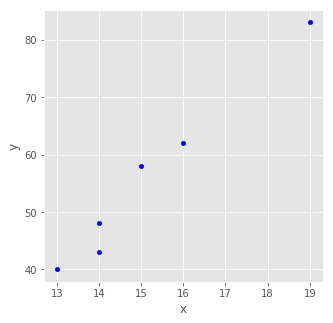

In [22]:
data.plot(kind='scatter', # 산점도를 그린다
         x='x', # 가로축은 x라고 라벨
         y='y', # 세로축은 y라고 라벨
         figsize=(5,5), # 가로 5인치, 세로 5인치 크기의 박스를 설정
         color='blue') # 산점도 상의 점 색상을 파랑 지정

In [27]:
# linear_model 모듈이 포함하고 있는 LinearRegression() 함수를 linear_regression 변수에 할당
linear_regression = linear_model.LinearRegression()

# LinearRegression()의 fit()이라는 함수를 이용하여 선형회귀모델 훈련 실행
# 이 때 독립변수는 x, 종속변수는 y
# fit 함수의 대문자 X 값은 TYPE이 DATAFRAME / 소문자 y는 SERIES
linear_regression.fit(X = pd.DataFrame(data['x']), y = data['y'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# 선형회귀식의 세로축 절편 'linear_regression.intercept_'를 구하여 출력
print('세로축 절편 a value = ', linear_regression.intercept_)

# 선형회귀식의 기울기 'linear_regression.coef_'를 구하여 출력
print('기울기 b value = ', linear_regression.coef_)

세로축 절편 a value =  -55.48175182481753
기울기 b value =  [7.32846715]


In [30]:
# 위에서 만들어진 선형회귀모델을 적용하여 선형회귀 값을 구해본다
# 그 값을 prediction에 할당한다
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))

# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다
residuals = data['y'] - prediction
print(residuals)

# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25%값, 50% 값, 75% 값, 최대값을 출력
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [34]:
# 잔차를 제곱하여 전체를 합침, 결과값을 SSE라는 변수에 할당
SSE = (residuals**2).sum()
print('SSE = ', SSE)

# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data['y']-data['y'].mean())**2).sum()
print('SST = ', SST)

# 적합도 검증을 위해 필요한 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)


SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


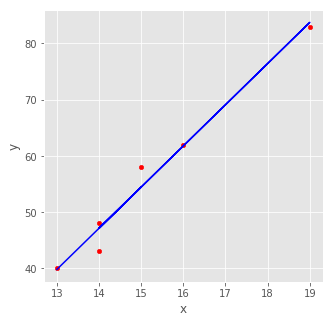

In [35]:
data.plot(kind="scatter", x="x", y="y", figsize = (5, 5), color = "red")

# Plot regression line
plt.plot(data["x"], prediction, color = "blue")

In [51]:
from sklearn.metrics import mean_squared_error

# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data['x']), y = data['y']))

# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))

# Mean squared error의 제곱근 값을 구함 / 평균제곱오차
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736
